In [ ]:
"""
see how well the density and reconstruction loss are related for different token counts
"""

In [1]:
import json
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
from torch.utils.data import DataLoader, Dataset
sys.path.append(os.path.abspath(".."))   # one level up from notebook/
from data.utils.dataloaders import ReconstructionDataset_Heuristic

/BS/data_mani_compress/work/miniforge3/envs/dgm_geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
# read the conditional densities
folder_path = "/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/old/train_conditional_corrected"

with open(os.path.join(folder_path, "tk_1/tk_1_all.json"), 'r') as f:
    cd_1 = json.load(f)

with open(os.path.join(folder_path, "tk_2/tk_2_all.json"), 'r') as f:
    cd_2 = json.load(f)

with open(os.path.join(folder_path, "tk_4/tk_4_all.json"), 'r') as f:
    cd_4 = json.load(f)

with open(os.path.join(folder_path, "tk_8/tk_8_all.json"), 'r') as f:
    cd_8 = json.load(f)

with open(os.path.join(folder_path, "tk_16/tk_16_all.json"), 'r') as f:
    cd_16 = json.load(f)

with open(os.path.join(folder_path, "tk_32/tk_32_all.json"), 'r') as f:
    cd_32 = json.load(f)

with open(os.path.join(folder_path, "tk_64/tk_64_all.json"), 'r') as f:
    cd_64 = json.load(f)

with open(os.path.join(folder_path, "tk_128/tk_128_all.json"), 'r') as f:
    cd_128 = json.load(f)

with open(os.path.join(folder_path, "tk_256/tk_256_all.json"), 'r') as f:
    cd_256 = json.load(f)

print(len(cd_1), len(cd_2), len(cd_4), len(cd_8), len(cd_16), len(cd_32), len(cd_64), len(cd_128), len(cd_256))

1281167 1281167 1281167 1281167 1281011 1281167 1281167 1281167 1281167


In [2]:
# read the conditional densities
folder_path = "/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/old/val_analysis"

with open(("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_1/token_count/1_0000_0200.json"), 'r') as f:
    cd_1 = json.load(f)

with open(os.path.join("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_2/token_count/2_0000_0200.json"), 'r') as f:
    cd_2 = json.load(f)

with open(os.path.join("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_4/token_count/4_0000_0200.json"), 'r') as f:
    cd_4 = json.load(f)

with open(os.path.join("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_8/token_count/8_0000_0200.json"), 'r') as f:
    cd_8 = json.load(f)

with open(os.path.join("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_16/token_count/16_0000_0200.json"), 'r') as f:
    cd_16 = json.load(f)

with open(os.path.join("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_32/token_count/32_0000_0200.json"), 'r') as f:
    cd_32 = json.load(f)

with open(os.path.join("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_64/token_count/64_0000_0200.json"), 'r') as f:
    cd_64 = json.load(f)

with open(os.path.join("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_128/token_count/128_0000_0200.json"), 'r') as f:
    cd_128 = json.load(f)

with open(os.path.join("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_256/token_count/256_0000_0200.json"), 'r') as f:
    cd_256 = json.load(f)

print(len(cd_1), len(cd_2), len(cd_4), len(cd_8), len(cd_16), len(cd_32), len(cd_64), len(cd_128), len(cd_256))
list_densities = [cd_1, cd_2, cd_4, cd_8, cd_16, cd_32, cd_64, cd_128, cd_256]

2620 2660 2580 2440 2740 2500 2520 2660 2660


In [3]:
integral_1 = [l[0] for l in cd_1]
source_1 = [l[1] for l in cd_1]

integral_2 = [l[0] for l in cd_2]
source_2 = [l[1] for l in cd_2]

integral_4 = [l[0] for l in cd_4]
source_4 = [l[1] for l in cd_4]

integral_8 = [l[0] for l in cd_8]    
source_8 = [l[1] for l in cd_8]

integral_16 = [l[0] for l in cd_16]
source_16 = [l[1] for l in cd_16]

integral_32 = [l[0] for l in cd_32]
source_32 = [l[1] for l in cd_32]

integral_64 = [l[0] for l in cd_64]
source_64 = [l[1] for l in cd_64]

integral_128 = [l[0] for l in cd_128]
source_128 = [l[1] for l in cd_128]

integral_256 = [l[0] for l in cd_256]
source_256 = [l[1] for l in cd_256]

In [123]:
# /BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_old_remember/val_density_old_remember/token_count/tk_1/token_count_0000_0200.json
# /BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_old_debug/val_density_old_remember_debug/token_count/tk_1/_0000_0200.json
with open("/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/clean/val_density_reconst_1/token_count/256_0000_0200.json", 'r') as f:
    cd_0 = json.load(f)

if True:
    cd_0 = [l[0]+l[1] for l in cd_0]
    print(len(cd_0))

2620


In [4]:
# read reconstruction loss json file 
with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/imagenet_reconstruction_losses/val_categorized/all_APG_on.json', 'r') as f:
    reconst_losses = json.load(f)

In [12]:
# this dataset holds the image_id, k_value, reconstruction_losses and optionally LID, density, edge ratio
dataset_1 = ReconstructionDataset_Heuristic(
    reconstruction_data=reconst_losses,
    local_density_information=[l[0]+l[1] for l in cd_4],
    error_key=['LPIPS', 'L1Loss']
)

In [13]:
# for quick debugging, COME HERE!
# when the densities which were loaded do not cover all reconstruction entries,
# we need to filter the reconstruction entries to those that have a density available

max_density_index = len(cd_4)  # upper bound (exclusive)

# Filter reconstruction entries to those that have a density available
filtered_reconst_losses = [
    rec for rec in reconst_losses
    if 'image_id' in rec and isinstance(rec['image_id'], (int, str))
       and int(rec['image_id']) < max_density_index
]

print(f"Original reconstruction entries: {len(reconst_losses)}")
print(f"Filtered reconstruction entries: {len(filtered_reconst_losses)}")

# Build a new dataset that is guaranteed safe for density indexing
dataset_1_filtered = ReconstructionDataset_Heuristic(
    reconstruction_data=filtered_reconst_losses,
    local_density_information=[l[0]+l[1] for l in cd_4],
    error_key=['LPIPS', 'L1Loss']
)

print(f"Length of filtered dataset: {len(dataset_1_filtered)}")

Original reconstruction entries: 450000
Filtered reconstruction entries: 23220
Length of filtered dataset: 23220


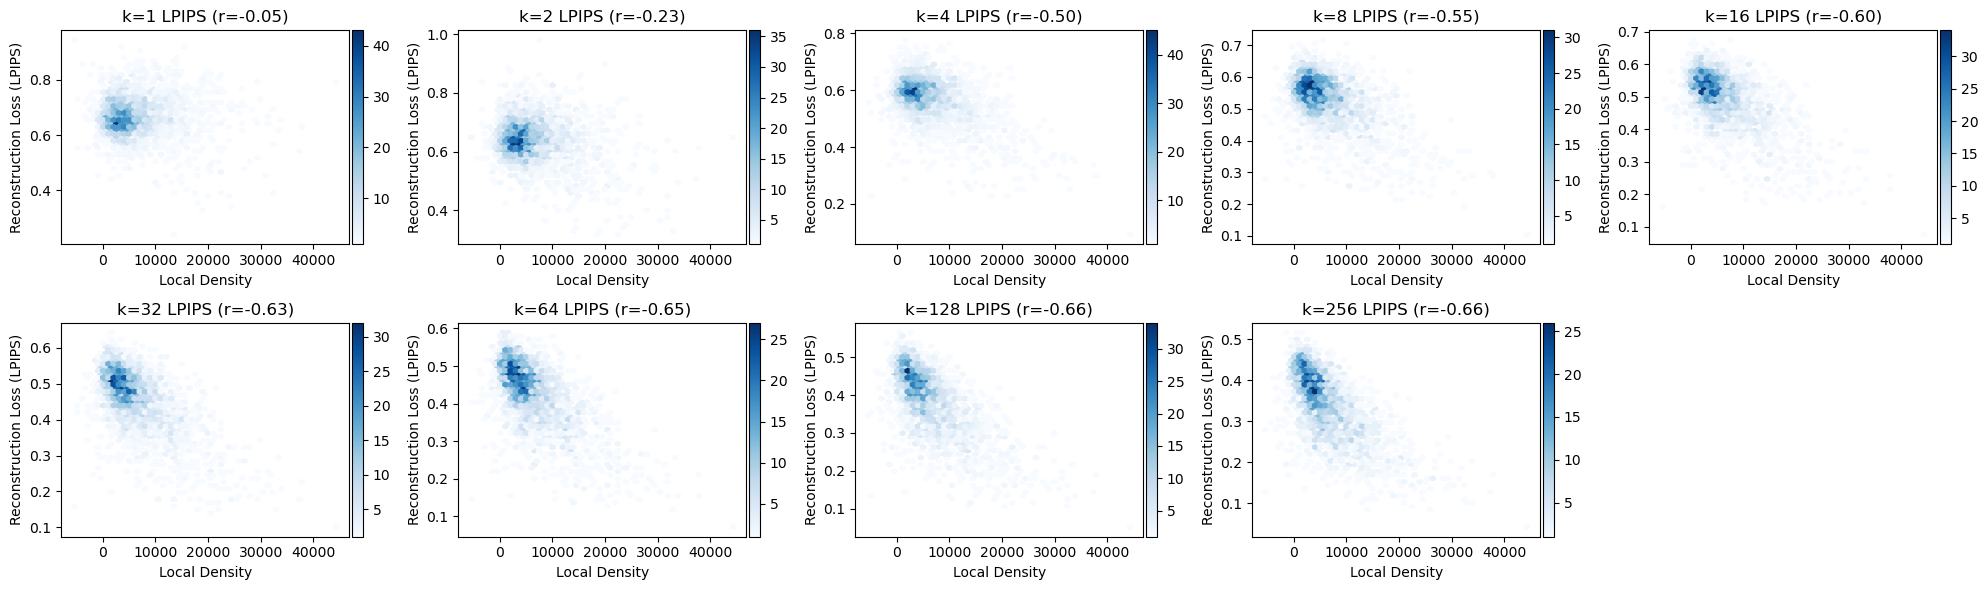

In [14]:
k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]
ncols   = 5
nrows   = int(math.ceil(len(k_values) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3), squeeze=False)
axes_flat = axes.flatten()

corr = []

for idx, k in enumerate(k_values):
    ax = axes_flat[idx]
    densities    = []
    losses_lpips = []
    for data_point in dataset_1_filtered:
        if data_point['k_value'] == k:
            densities.append(data_point['local_density'])
            losses_lpips.append(data_point['LPIPS'])

    # First hexbin: LPIPS vs density
    hb1 = ax.hexbin(densities, losses_lpips, gridsize=50, cmap='Blues', mincnt=1)
    if len(densities) > 1:
        corr1 = np.corrcoef(densities, losses_lpips)[0, 1]
    else:
        corr1 = float('nan')
    ax.set_title(f"k={k} LPIPS (r={corr1:.2f})")
    ax.set_xlabel('Local Density')
    ax.set_ylabel('Reconstruction Loss (LPIPS)')

    corr.append(corr1)

    # Optionally add a colorbar for the first hexbin
    fig.colorbar(hb1, ax=ax, orientation='vertical', pad=0.01, fraction=0.05)

# Hide unused subplots (if grid larger than number of k_values)
for j in range(len(k_values), nrows * ncols):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

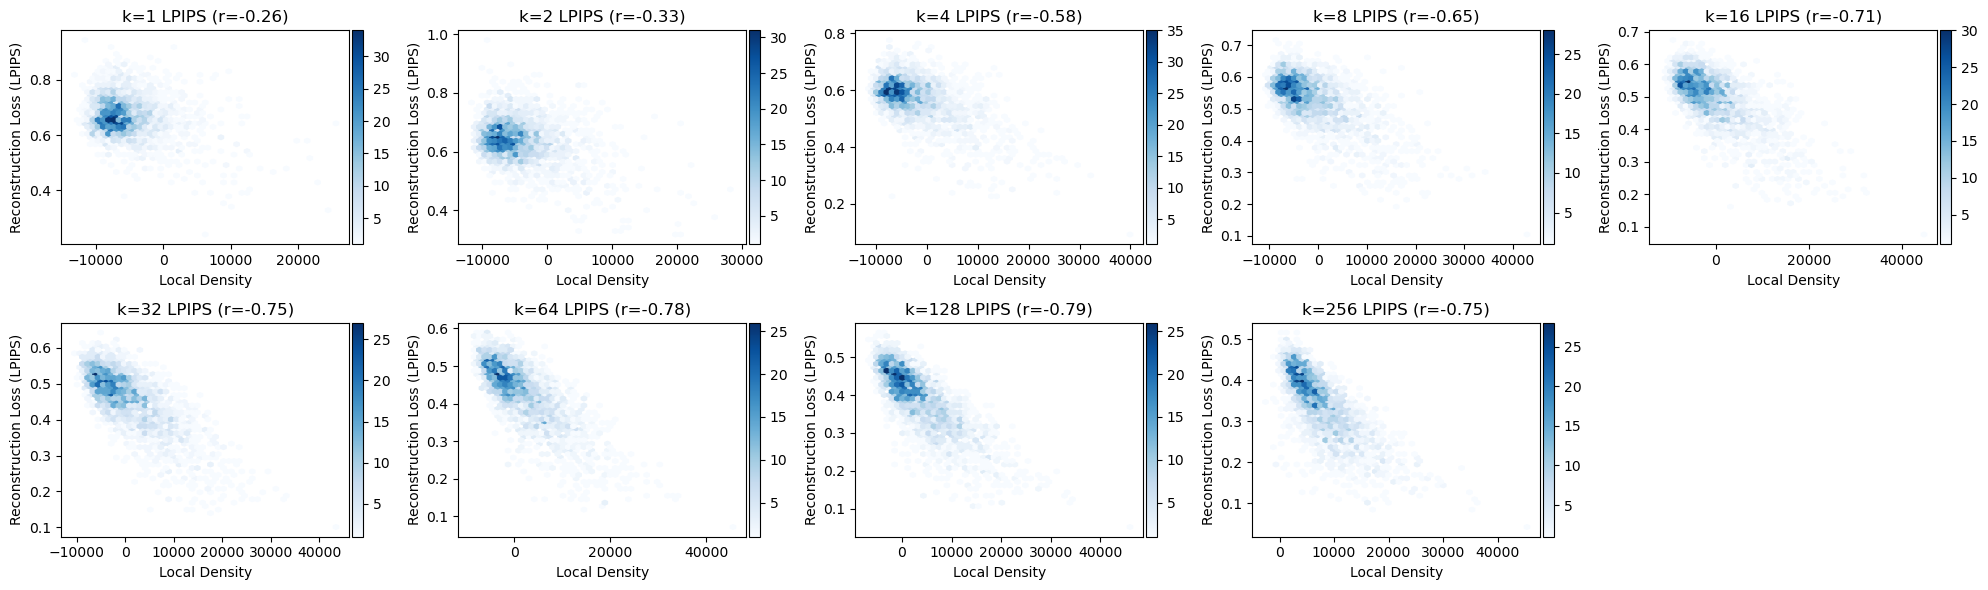

In [136]:
k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]
ncols   = 5
nrows   = int(math.ceil(len(k_values) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3), squeeze=False)
axes_flat = axes.flatten()

corr = []

for idx, k in enumerate(k_values):
    ax = axes_flat[idx]
    
    # start here
    max_density_index = len(list_densities[idx])  # upper bound (exclusive)
    
    # Filter reconstruction entries to those that have a density available
    filtered_reconst_losses = [
        rec for rec in reconst_losses
        if 'image_id' in rec and isinstance(rec['image_id'], (int, str))
        and int(rec['image_id']) < max_density_index
    ]

    cd = [l[0]+l[1] for l in list_densities[idx]]
    # Build a new dataset that is guaranteed safe for density indexing
    dataset_1_filtered = ReconstructionDataset_Heuristic(
        reconstruction_data=filtered_reconst_losses,
        local_density_information=cd,
        error_key=['LPIPS', 'L1Loss']
    )

    densities    = []
    losses_lpips = []
    
    for data_point in dataset_1_filtered:
        if data_point['k_value'] == k:
            densities.append(data_point['local_density'])
            losses_lpips.append(data_point['LPIPS'])

    # end here

    # First hexbin: LPIPS vs density
    hb1 = ax.hexbin(densities, losses_lpips, gridsize=50, cmap='Blues', mincnt=1)
    if len(densities) > 1:
        corr1 = np.corrcoef(densities, losses_lpips)[0, 1]
    else:
        corr1 = float('nan')
    ax.set_title(f"k={k} LPIPS (r={corr1:.2f})")
    ax.set_xlabel('Local Density')
    ax.set_ylabel('Reconstruction Loss (LPIPS)')

    corr.append(corr1)

    # Optionally add a colorbar for the first hexbin
    fig.colorbar(hb1, ax=ax, orientation='vertical', pad=0.01, fraction=0.05)

# Hide unused subplots (if grid larger than number of k_values)
for j in range(len(k_values), nrows * ncols):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

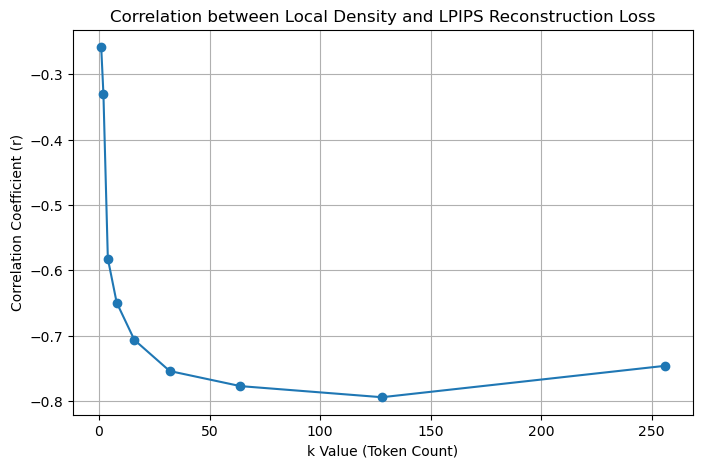

In [137]:
# plot correlation vs k_values
plt.figure(figsize=(8, 5))
plt.plot(k_values, corr, marker='o')
#plt.xscale('log', base=2)
plt.xlabel('k Value (Token Count)')
plt.ylabel('Correlation Coefficient (r)')
plt.title('Correlation between Local Density and LPIPS Reconstruction Loss')
plt.grid(True)
plt.show()